# Simple Web Scraping

## Libraries

In [40]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import urllib.request
import numpy as np

## 1. Scrape web

In [4]:
r = requests.get('https://www.goodreads.com/quotes/tag/inspirational')

In [5]:
r.status_code

200

In [6]:
#ckech result
r.text

'<!DOCTYPE html>\n<html class="desktop\n">\n<head>\n  <title>Inspirational Quotes (61538 quotes)</title>\n\n<meta content="61538 quotes have been tagged as inspirational: Oscar Wilde: ‘Be yourself; everyone else is already taken.’, William W. Purkey: ‘You\'ve gotta dance like ..." name=\'description\'>\n<meta content=\'telephone=no\' name=\'format-detection\'>\n<link href=\'https://www.goodreads.com/quotes/tag/inspirational\' rel=\'canonical\'>\n\n\n\n    <script type="text/javascript"> var ue_t0=window.ue_t0||+new Date();\n </script>\n  <script type="text/javascript">\n    var ue_mid = "A1PQBFHBHS6YH1";\n    var ue_sn = "www.goodreads.com";\n    var ue_furl = "fls-na.amazon.com";\n    var ue_sid = "153-3282056-4032772";\n    var ue_id = "K9WA3BPWWWD0PWVC3XXH";\n\n    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}funct

In [7]:
soup = BeautifulSoup(r.text, 'html.parser')

### Extract paragrams

In [11]:
result = soup.find_all('div', attrs={'class': 'quoteText'})

In [27]:
# get th text and authors
for i in result:
    print(i.text.strip().split('\n')[0])
    author = i.find('span', attrs={'class': 'authorOrTitle'}).text.strip()
    print(author)

“Be yourself; everyone else is already taken.”
Oscar Wilde
“You've gotta dance like there's nobody watching,Love like you'll never be hurt,Sing like there's nobody listening,And live like it's heaven on earth.”
William W. Purkey
“Be the change that you wish to see in the world.”
Mahatma Gandhi
“Live as if you were to die tomorrow. Learn as if you were to live forever.”
Mahatma Gandhi
“Darkness cannot drive out darkness: only light can do that. Hate cannot drive out hate: only love can do that.”
Martin Luther King Jr.,
“Without music, life would be a mistake.”
Friedrich Nietzsche,
“We accept the love we think we deserve.”
Stephen Chbosky,
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
Marilyn Monroe
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
Albert Einstein
“We are all in the gutter, but some of us are looking at the stars.”
Oscar Wild

### Make a funtion to scrape web

In [69]:
quotes = []
authors =[]

#### Note:
when you scrape more than 1 you have to play back quotes and authors

In [65]:
# Make a funtion to scrape webside
def scrape_web(page_number):
    page_num = str(page_number)
    url = 'https://www.goodreads.com/quotes/tag/inspirational?page='+ page_num
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.text, 'html.parser')
    quoteText = soup.find_all('div', attrs={'class': 'quoteText'})
    for i in quoteText:
        quote = i.text.strip().split('\n')[0] # Get the quoute text
        author = i.find('span', attrs={'class': 'authorOrTitle'}).text.strip() # Get the author
        quotes.append(quote)
        authors.append(author)

In [66]:
scrape_web(1)

In [67]:
authors[:5]

['Oscar Wilde',
 'William W. Purkey',
 'Mahatma Gandhi',
 'Mahatma Gandhi',
 'Martin Luther King Jr.,']

In [68]:
quotes[:5]

['“Be yourself; everyone else is already taken.”',
 "“You've gotta dance like there's nobody watching,Love like you'll never be hurt,Sing like there's nobody listening,And live like it's heaven on earth.”",
 '“Be the change that you wish to see in the world.”',
 '“Live as if you were to die tomorrow. Learn as if you were to live forever.”',
 '“Darkness cannot drive out darkness: only light can do that. Hate cannot drive out hate: only love can do that.”']

In [70]:
# Loop trough 'n pages' and scrape
n = 3
for num in range(0,n):
    scrape_web(num)
    
#for loop play back quotes and authors

In [71]:
quotes[:5]

['“Be yourself; everyone else is already taken.”',
 "“You've gotta dance like there's nobody watching,Love like you'll never be hurt,Sing like there's nobody listening,And live like it's heaven on earth.”",
 '“Be the change that you wish to see in the world.”',
 '“Live as if you were to die tomorrow. Learn as if you were to live forever.”',
 '“Darkness cannot drive out darkness: only light can do that. Hate cannot drive out hate: only love can do that.”']

### Convert to DataFrame

In [72]:
df = pd.DataFrame(np.array(quotes), columns=['Text'])

In [73]:
df['Author'] = np.array(authors)

In [74]:
df.head()

,Text,Author
0,“Be yourself; everyone else is already taken.”,Oscar Wilde
1,“You've gotta dance like there's nobody watchi...,William W. Purkey
2,“Be the change that you wish to see in the wor...,Mahatma Gandhi
3,“Live as if you were to die tomorrow. Learn as...,Mahatma Gandhi
4,“Darkness cannot drive out darkness: only ligh...,"Martin Luther King Jr.,"


In [75]:
df.tail()

,Text,Author
85,“I hope she'll be a fool -- that's the best th...,"F. Scott Fitzgerald,"
86,"“Two wrongs don't make a right, but they make ...",Thomas Szasz
87,“May you live every day of your life.”,Jonathan Swift
88,“First they ignore you. Then they ridicule you...,Nicholas Klein
89,“Who controls the past controls the future. Wh...,"George Orwell,"


In [76]:
df.shape

(90, 2)

## 2. Clean Data

In [78]:
import neattext.functions as nfx

In [90]:
df['Clean_text'] = df['Text'].apply(nfx.remove_bad_quotes)
df['clean_author']= df['Author'].apply(nfx.remove_bad_quotes)

In [91]:
df['Clean_text']=df['Clean_text'].apply(nfx.remove_puncts)
df['clean_author']=df['clean_author'].apply(nfx.remove_puncts)

In [95]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_multiple_spaces)
df['clean_author'] = df['clean_author'].apply(nfx.remove_multiple_spaces)

In [101]:
df['Clean_text'] =df['Clean_text'].apply(lambda x: x.strip())
df['clean_author'] =df['clean_author'].apply(lambda x: x.strip())

In [104]:
df.columns

Index(['Text', 'Author', 'Clean_text', 'clean_author'], dtype='object')

In [105]:
df_select = df[['Clean_text', 'clean_author']]

In [106]:
df_select.head()

,Clean_text,clean_author
0,Be yourself everyone else is already taken,Oscar Wilde
1,Youve gotta dance like theres nobody watchingL...,William W Purkey
2,Be the change that you wish to see in the world,Mahatma Gandhi
3,Live as if you were to die tomorrow Learn as i...,Mahatma Gandhi
4,Darkness cannot drive out darkness: only light...,Martin Luther King Jr


In [107]:
df_select.to_csv('web_scrapping.csv', index=False)

## EDA

In [128]:
df_select.shape

(90, 2)

In [109]:
# How many Authors Are?
len(df_select['clean_author'].unique())

49

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
df_select['clean_author'].value_counts().nlargest(15)

Mahatma Gandhi         5
Albert Einstein        4
Marilyn Monroe         4
Oscar Wilde            4
Stephen Chbosky        4
Paulo Coelho           3
Maya Angelou           3
Dr Seuss               3
CS Lewis               3
F Scott Fitzgerald     2
Elie Wiesel            2
Bill Keane             2
Shel Silverstein       2
Neil Gaiman            2
Winston S Churchill    2
Name: clean_author, dtype: int64

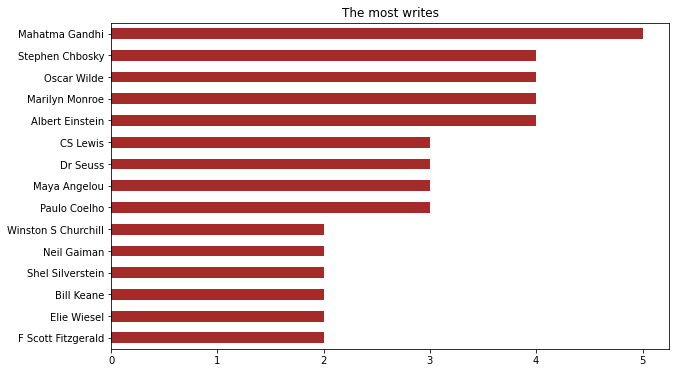

In [122]:
df_select['clean_author'].value_counts().nlargest(15).sort_values(ascending = True).plot(kind='barh', figsize=(10,6), color = 'brown').set_title('The most writes');

In [124]:
df_select[df_select['clean_author'] =='Marilyn Monroe']['Clean_text']

7     Imperfection is beauty madness is genius and i...
17    This life is what you make it No matter what y...
37    Imperfection is beauty madness is genius and i...
47    This life is what you make it No matter what y...
Name: Clean_text, dtype: object

In [125]:
df_select[df_select['clean_author'] =='Mahatma Gandhi']['Clean_text']

2       Be the change that you wish to see in the world
3     Live as if you were to die tomorrow Learn as i...
32      Be the change that you wish to see in the world
33    Live as if you were to die tomorrow Learn as i...
69    When I despair I remember that all through his...
Name: Clean_text, dtype: object

In [127]:
df_cleaned = df_select.drop_duplicates()

In [129]:
df_cleaned.shape

(60, 2)

In [131]:
df_cleaned['clean_author'].value_counts().nlargest(15)

Mahatma Gandhi         3
CS Lewis               2
Marilyn Monroe         2
Paulo Coelho           2
Maya Angelou           2
F Scott Fitzgerald     2
Albert Einstein        2
Stephen Chbosky        2
Oscar Wilde            2
Dr Seuss               2
Theodore Roosevelt     1
John Green             1
Winston S Churchill    1
Gustave Flaubert       1
Ralph Waldo Emerson    1
Name: clean_author, dtype: int64

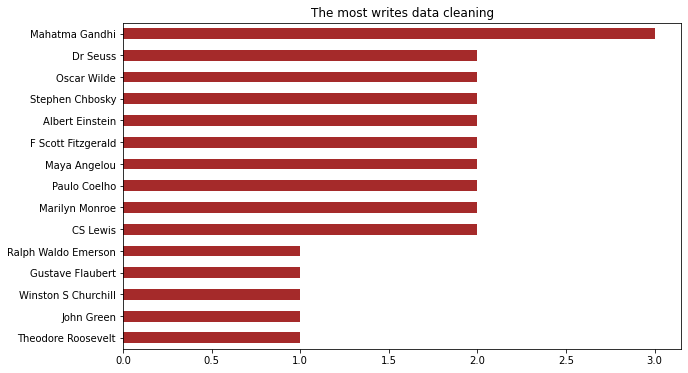

In [132]:
df_cleaned['clean_author'].value_counts().nlargest(15).sort_values(ascending = True).plot(kind='barh', figsize=(10,6), color = 'brown').set_title('The most writes data cleaning');

In [133]:
df_cleaned[df_cleaned['clean_author'] =='Mahatma Gandhi']['Clean_text']

2       Be the change that you wish to see in the world
3     Live as if you were to die tomorrow Learn as i...
69    When I despair I remember that all through his...
Name: Clean_text, dtype: object

In [134]:
df_cleaned[df_cleaned['clean_author'] =='Marilyn Monroe']['Clean_text']

7     Imperfection is beauty madness is genius and i...
17    This life is what you make it No matter what y...
Name: Clean_text, dtype: object

In [135]:
df_cleaned[df_cleaned['clean_author'] =='Dr Seuss']['Clean_text']

15    You have brains in your head You have feet in ...
64               A persons a person no matter how small
Name: Clean_text, dtype: object

In [136]:
df_cleaned.to_csv('web_scrape_cleaned.csv', index = False)